DATA EXPLORATION 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, RobustScaler
df = pd.read_csv('/Users/imran/Downloads/breast_cancer_dataset.csv')
df.head()
df.shape

(569, 32)

In [65]:
df = df.drop(df.columns[0], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
print(df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


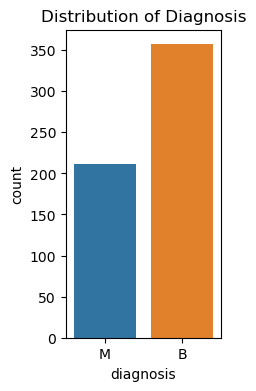

In [67]:
plt.figure(figsize=(2, 4)) 
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

In [68]:
mean_vals = df.mean(numeric_only=True)
median_vals = df.median(numeric_only=True)
std_vals = df.std(numeric_only=True)

summary_df = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Standard Deviation': std_vals
})

summary_df = summary_df.round(2)

print(summary_df)


                           Mean  Median  Standard Deviation
radius_mean               14.13   13.37                3.52
texture_mean              19.29   18.84                4.30
perimeter_mean            91.97   86.24               24.30
area_mean                654.89  551.10              351.91
smoothness_mean            0.10    0.10                0.01
compactness_mean           0.10    0.09                0.05
concavity_mean             0.09    0.06                0.08
concave points_mean        0.05    0.03                0.04
symmetry_mean              0.18    0.18                0.03
fractal_dimension_mean     0.06    0.06                0.01
radius_se                  0.41    0.32                0.28
texture_se                 1.22    1.11                0.55
perimeter_se               2.87    2.29                2.02
area_se                   40.34   24.53               45.49
smoothness_se              0.01    0.01                0.00
compactness_se             0.03    0.02 

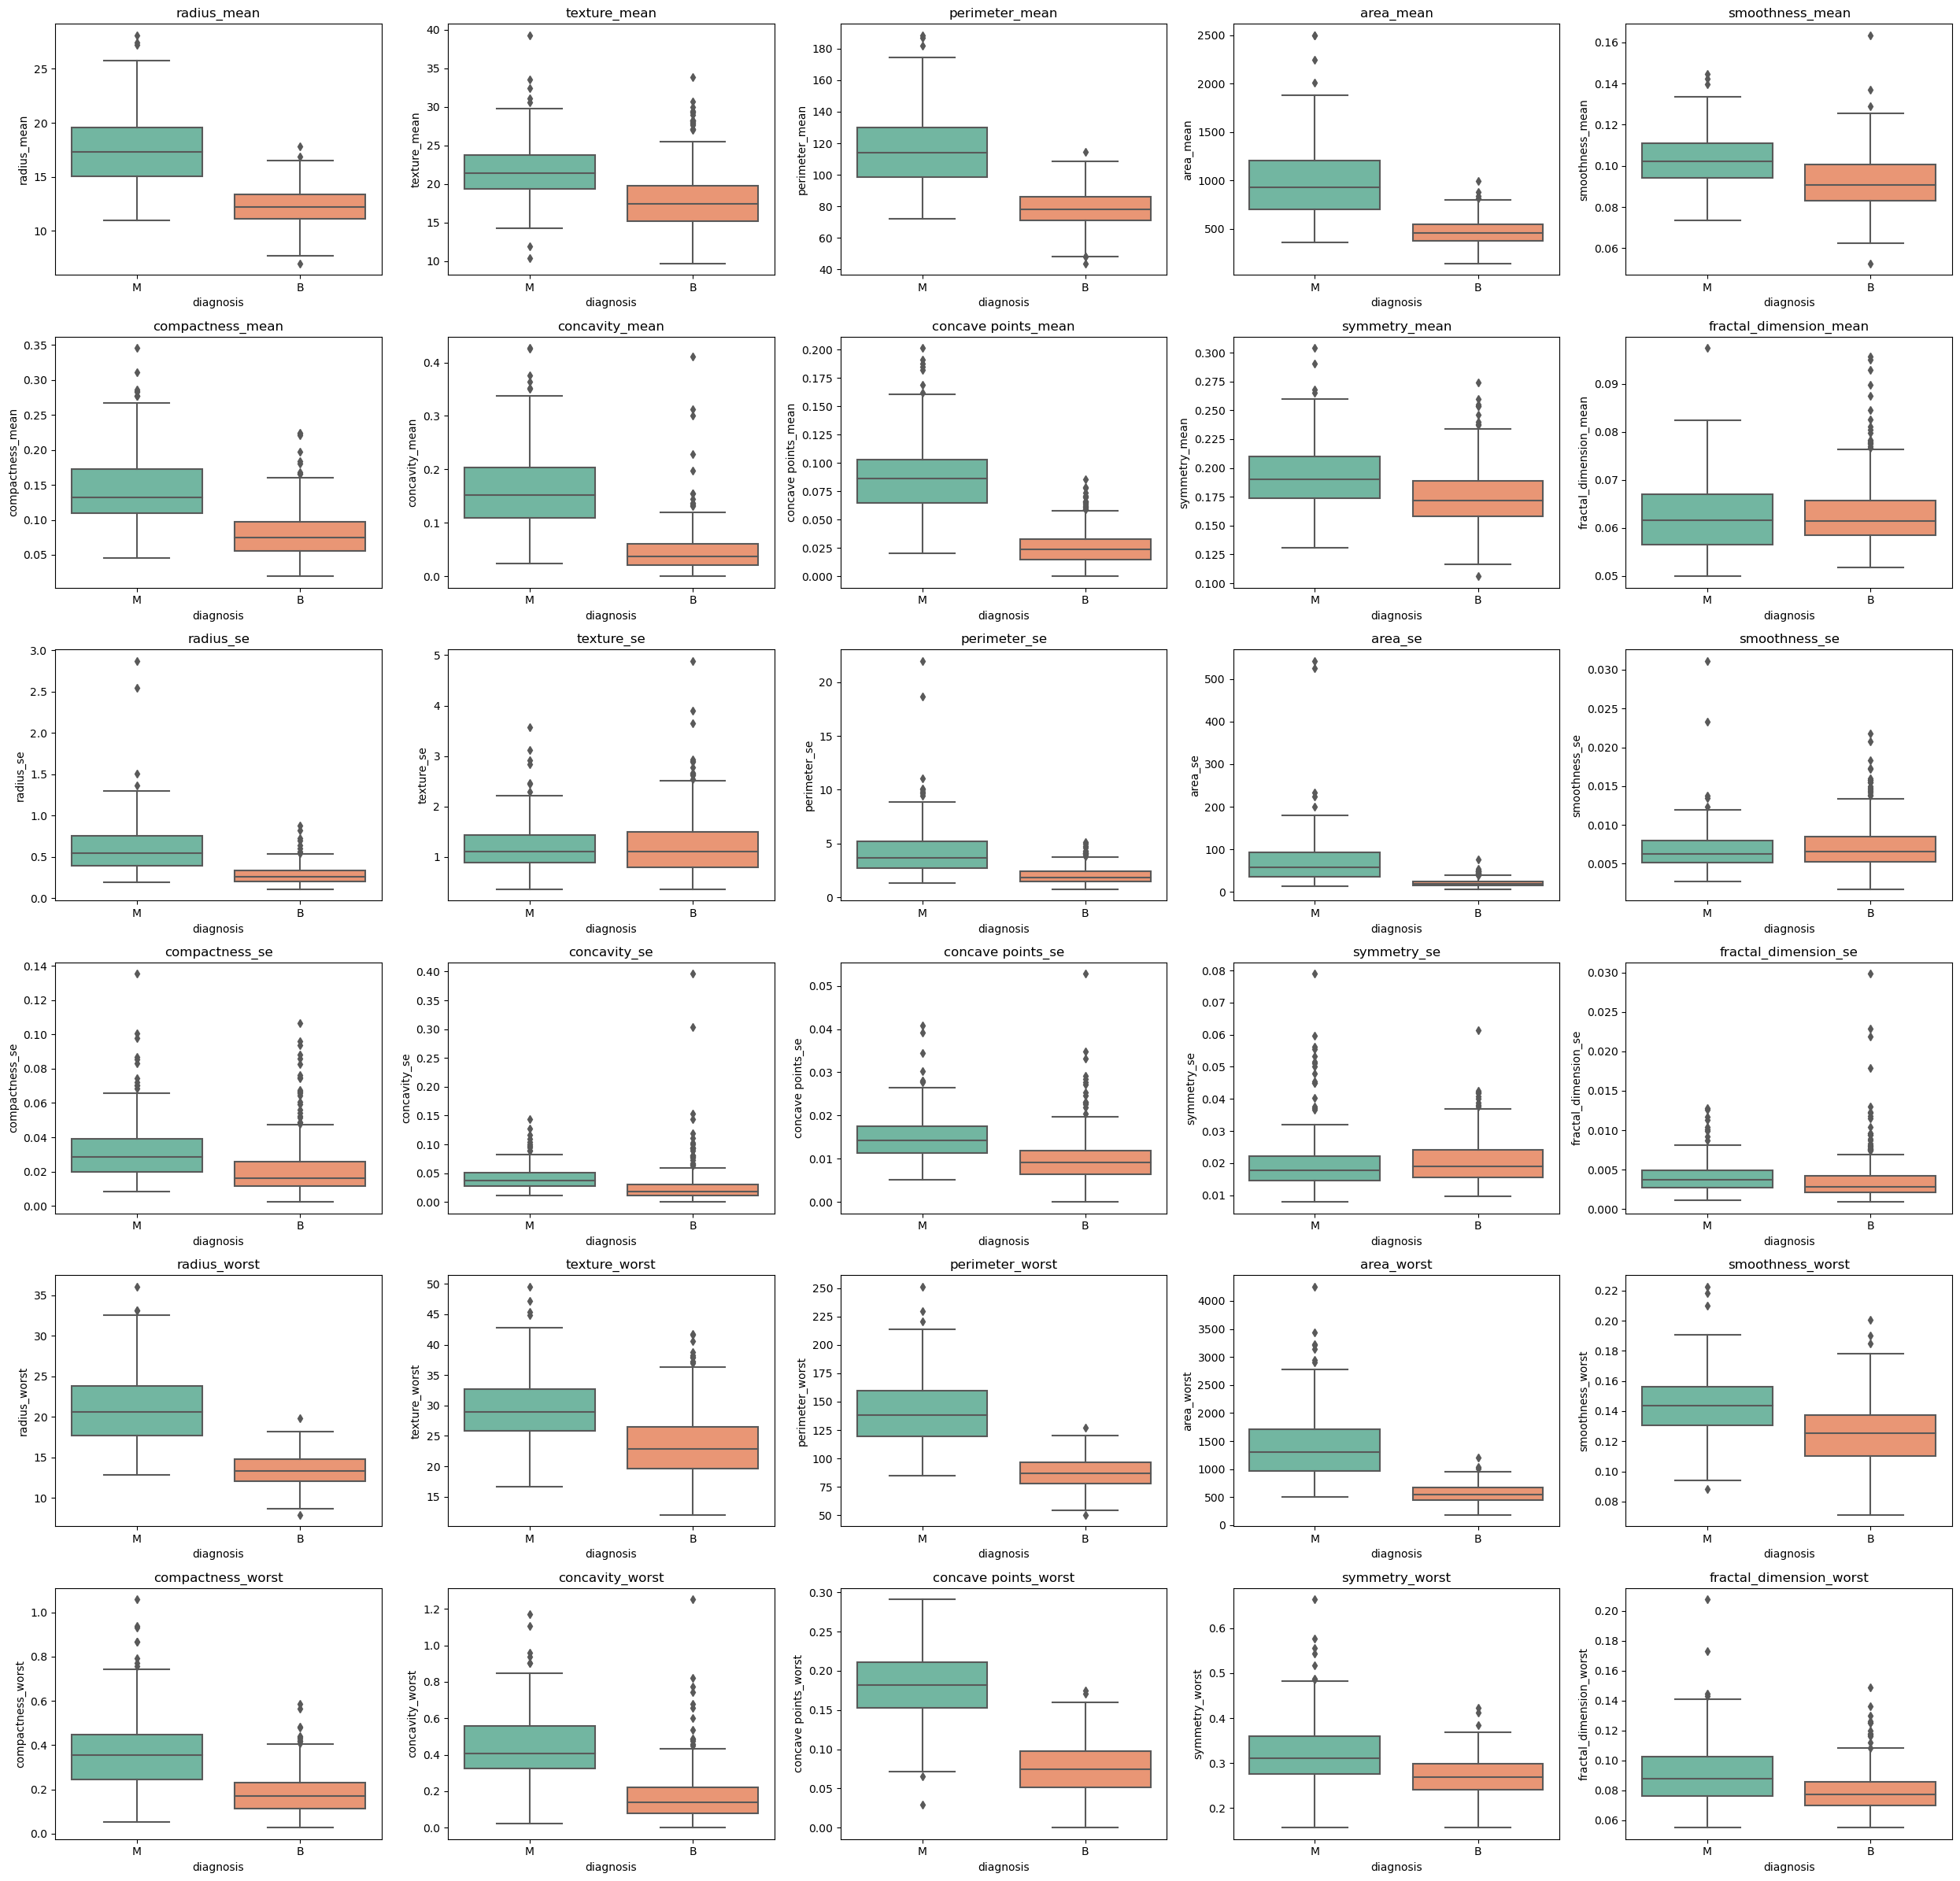

In [69]:
numeric_cols = df.select_dtypes(include='number').columns

n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')
    plt.title(col)
    plt.tight_layout()

plt.show()


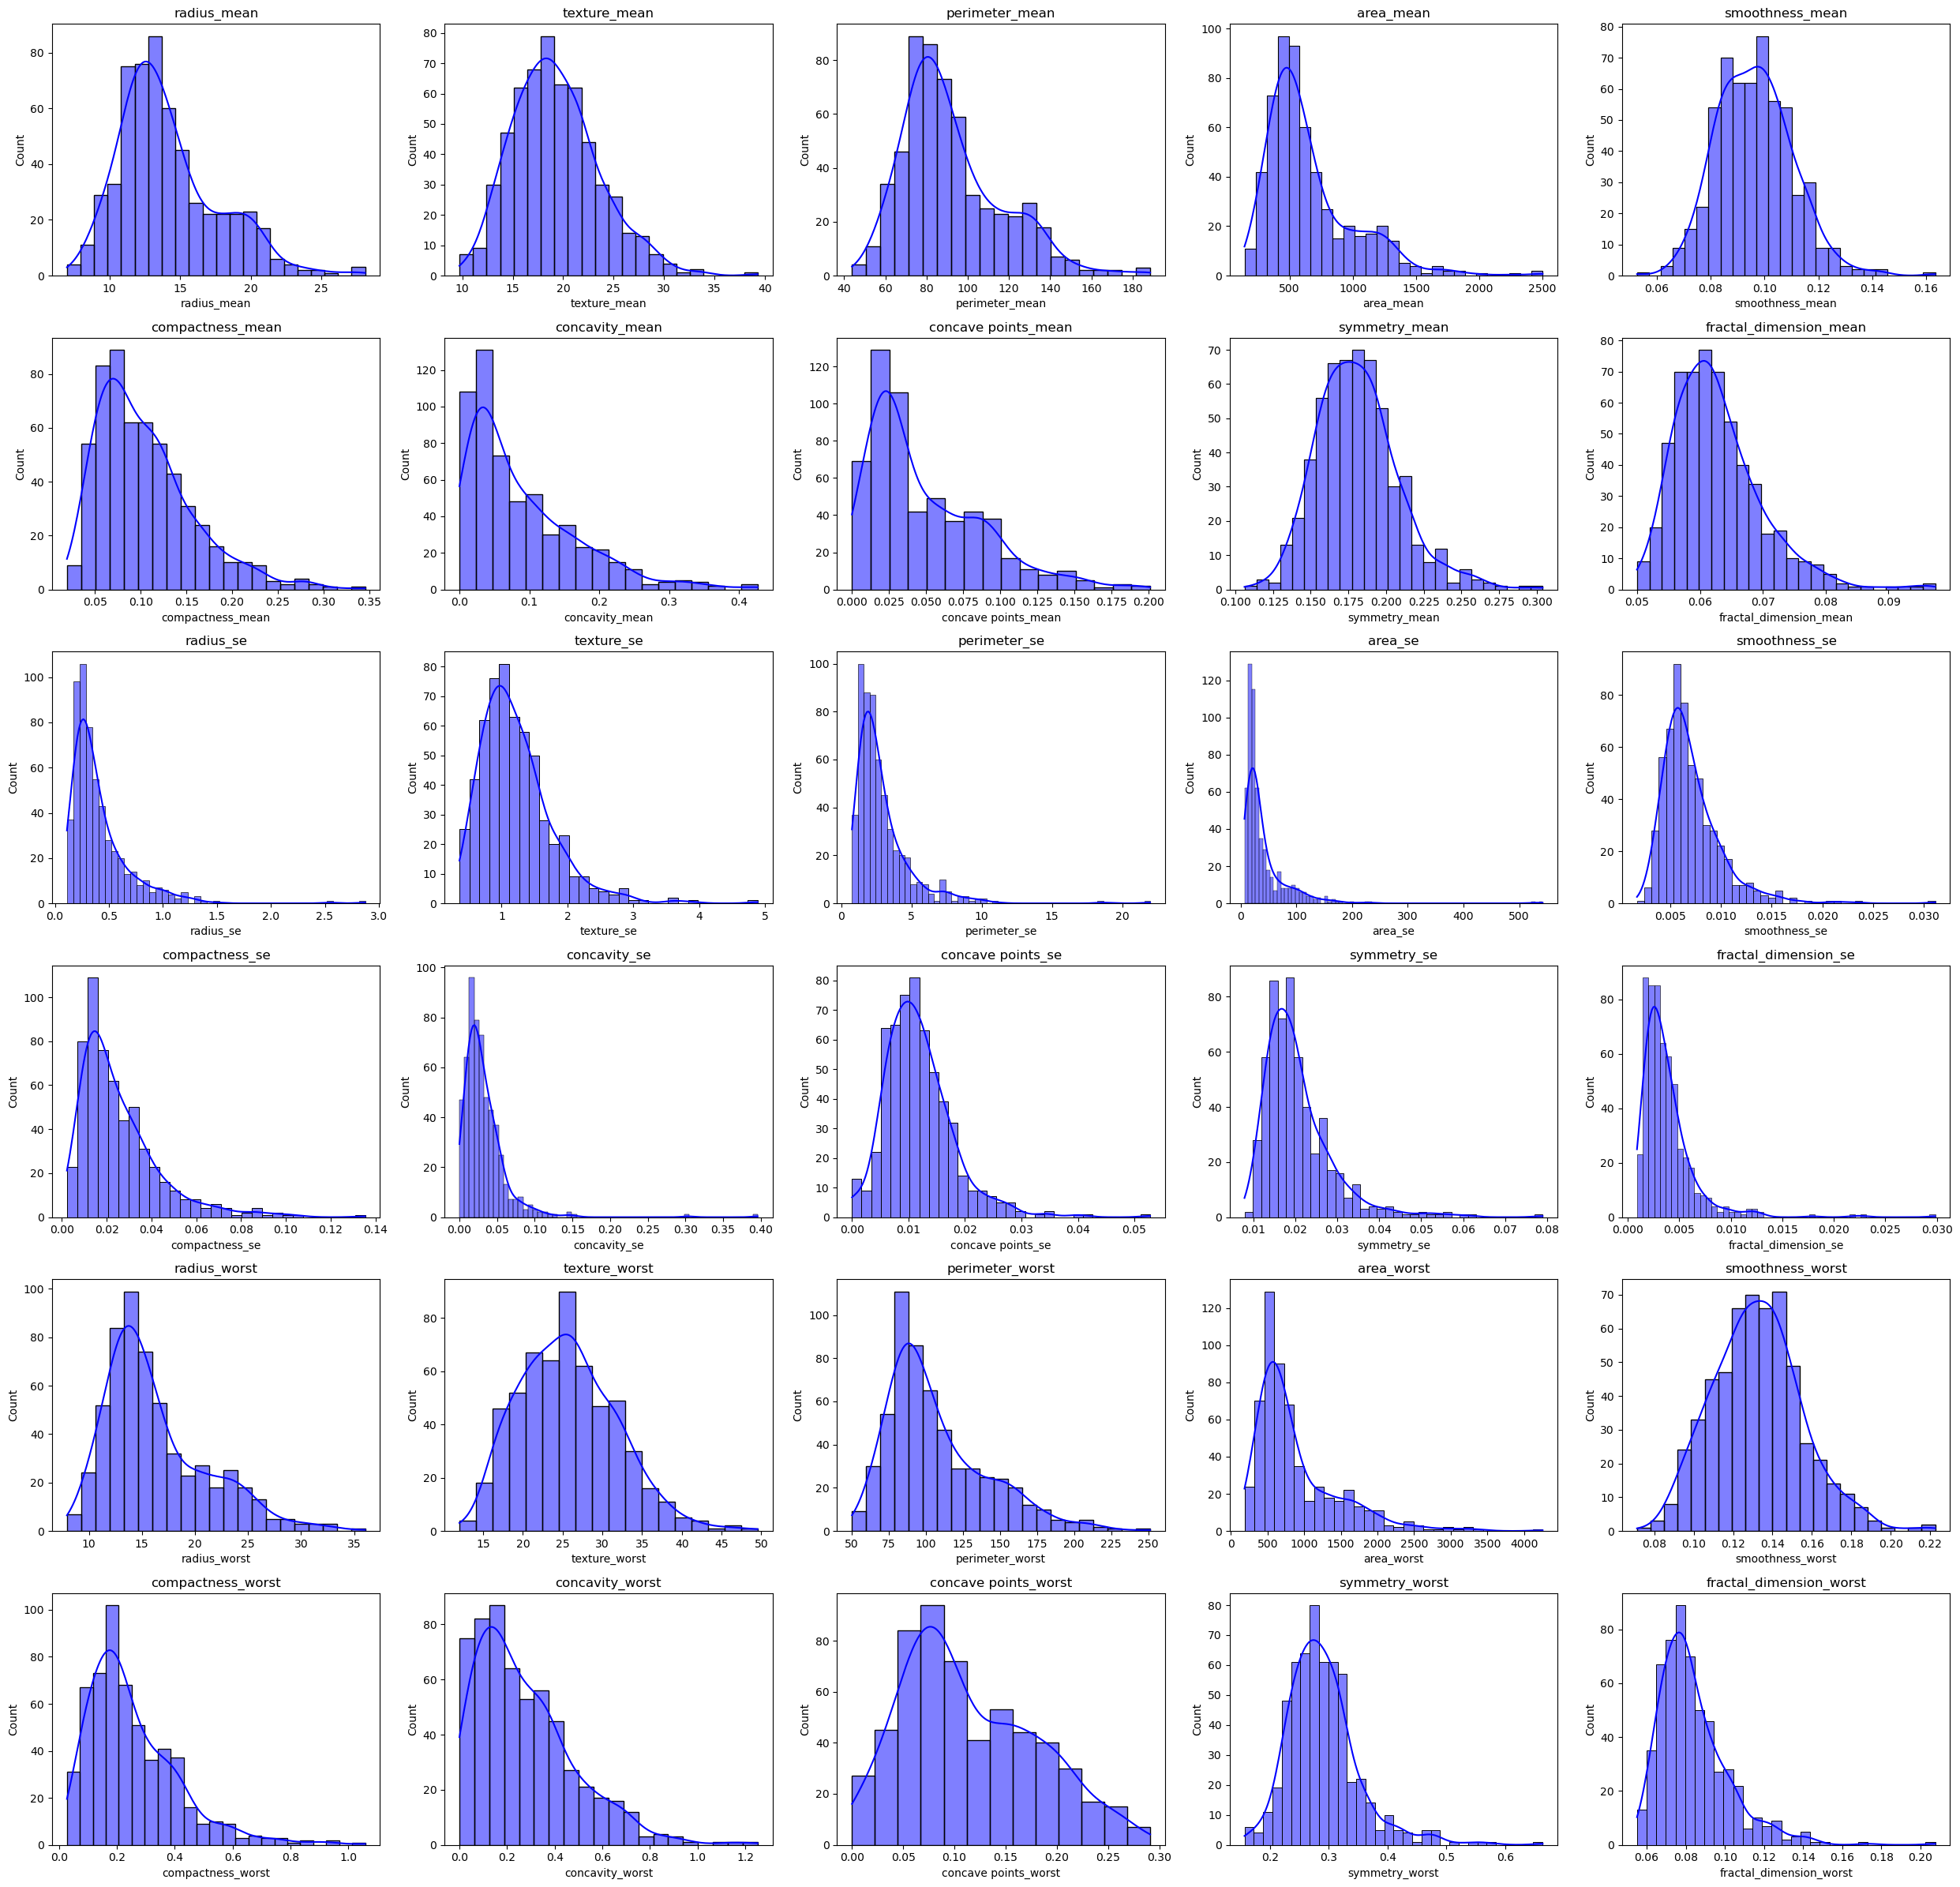

In [70]:
numeric_cols = df.select_dtypes(include='number').columns

n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [71]:
numeric_cols = df.select_dtypes(include='number').columns
skewness = df[numeric_cols].skew()
skewed_cols = skewness[abs(skewness) > 1].index.tolist()
print("Skewed columns:", skewed_cols)

pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])
df.head()

Skewed columns: ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1.126421,0.11840,2.165938,1.862988,1.848558,0.2419,...,1.619635,17.33,1.810506,1.652210,0.1622,1.942737,1.730182,0.2654,2.197206,1.723624
1,M,20.57,17.77,132.90,1.633946,0.08474,-0.384102,0.291976,0.820609,0.1812,...,1.578689,23.41,1.430616,1.610022,0.1238,-0.296580,0.070746,0.1860,-0.121997,0.537179
2,M,19.69,21.25,130.00,1.461645,0.10960,1.163977,1.403673,1.683104,0.2069,...,1.419757,25.53,1.321941,1.425307,0.1444,1.209701,1.005512,0.2430,1.218181,0.453955
3,M,11.42,20.38,77.58,-0.836238,0.14250,2.197843,1.642391,1.423004,0.2597,...,-0.083692,26.50,-0.039480,-0.436860,0.2098,2.282276,1.675087,0.2575,3.250202,2.517606
4,M,20.29,14.34,135.10,1.595120,0.10030,0.762392,1.407479,1.410929,0.1809,...,1.293727,16.67,1.316582,1.309486,0.1374,-0.131829,0.817474,0.1625,-0.943554,-0.279402


PEARSON CORRELATION

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.973277   
texture_mean                0.323782      1.000000        0.329533   0.313035   
perimeter_mean              0.997855      0.329533        1.000000   0.968389   
area_mean                   0.973277      0.313035        0.968389   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.130633   
compactness_mean            0.509024      0.228381        0.554942   0.476716   
concavity_mean              0.674773      0.308446        0.709353   0.647427   
concave points_mean         0.785146      0.278890        0.810741   0.769677   
symmetry_mean               0.147741      0.071401        0.183027   0.108900   
fractal_dimension_mean     -0.336341     -0.078684       -0.285689  -0.386828   
radius_se                   0.637444      0.332459        0.648569   0.586677   
texture_se                 -

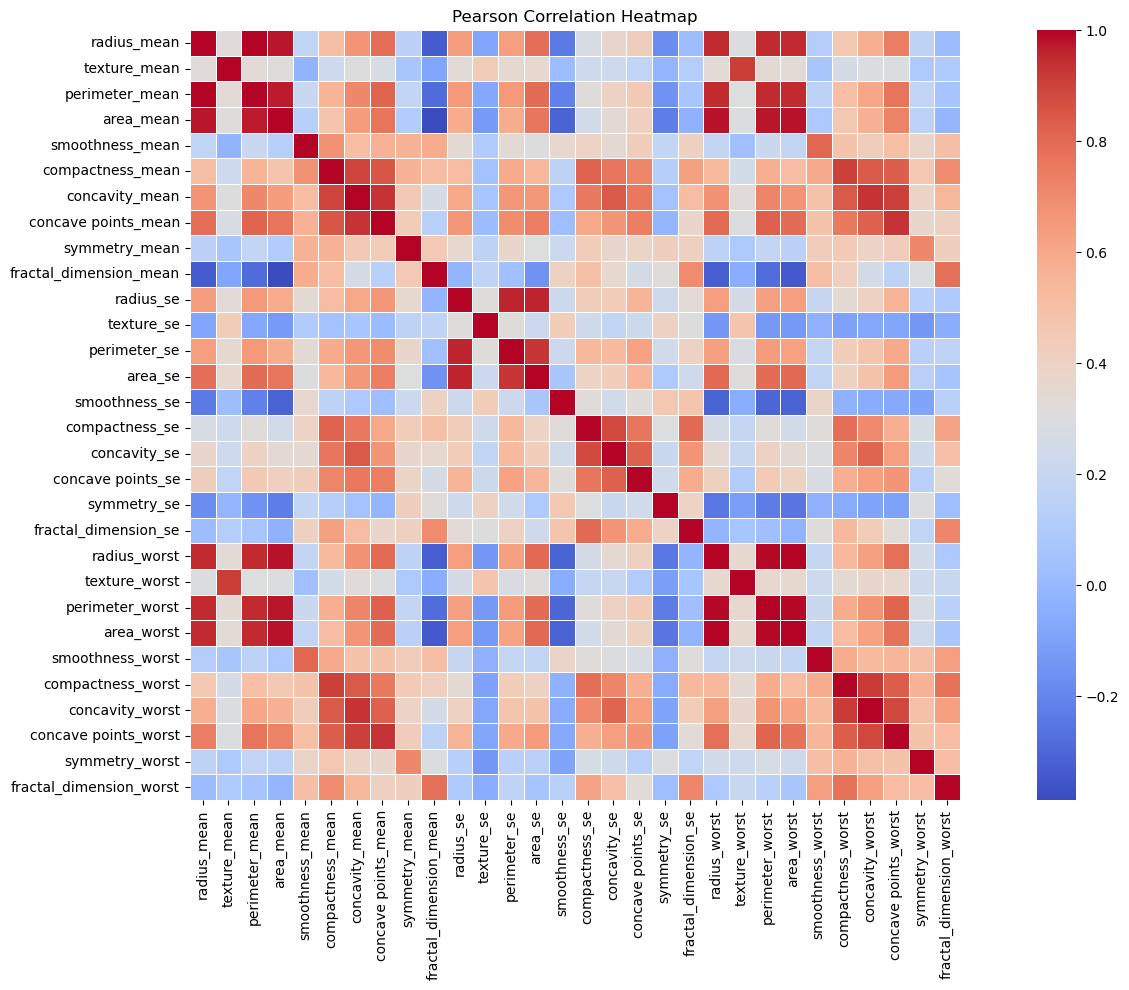

In [72]:
corr_matrix = df[numeric_cols].corr(method='pearson')

print(corr_matrix)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix,fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [73]:
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()
correlation = df.corr(method='pearson')

cor_with_diagnosis = correlation['diagnosis_numeric'].drop('diagnosis_numeric')
most_correlated_feature = cor_with_diagnosis.abs().idxmax()
max_value = cor_with_diagnosis[most_correlated_feature]

print(f"\n🔍 Feature most correlated with diagnosis: '{most_correlated_feature}' (Correlation = {max_value:.3f})")



🔍 Feature most correlated with diagnosis: 'concave points_mean' (Correlation = 0.795)


/var/folders/mb/hw3xksn15d3ctg46lrcdl8kc0000gp/T/ipykernel_10184/1092408876.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='pearson')


/var/folders/mb/hw3xksn15d3ctg46lrcdl8kc0000gp/T/ipykernel_10184/3230872481.py:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/Users/Swetha/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


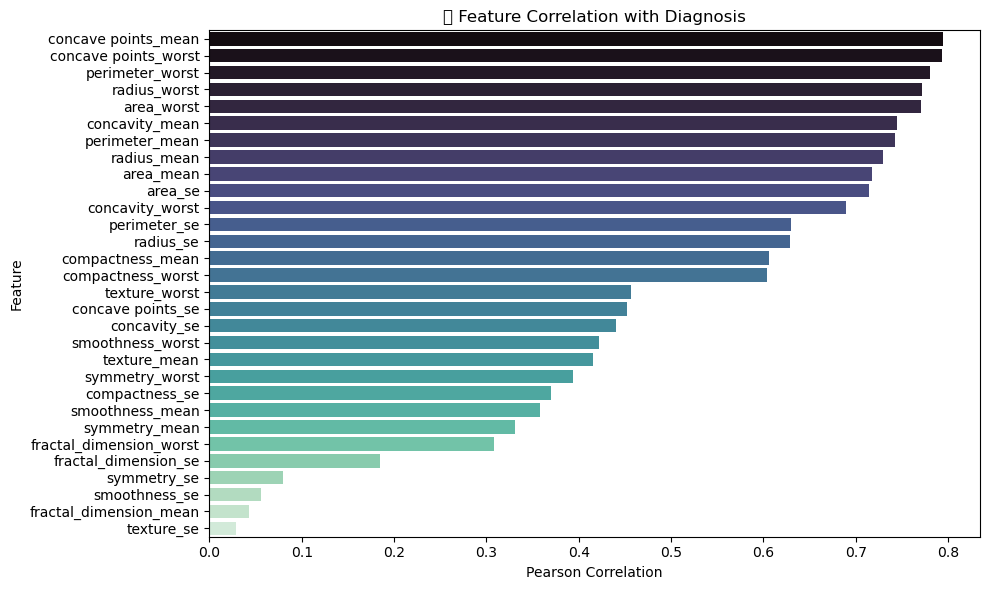

In [74]:
cor_sorted = cor_with_diagnosis.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cor_sorted.values, y=cor_sorted.index, palette='mako')
plt.title('🔍 Feature Correlation with Diagnosis')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [75]:
!pip install dcor

import dcor

dcor_scores = {}
for col in df.select_dtypes('number').drop(columns='diagnosis_numeric'):
    dcor_scores[col] = dcor.distance_correlation(df['diagnosis_numeric'], df[col])

pd.Series(dcor_scores).sort_values(ascending=False)

/Users/Swetha/anaconda3/lib/python3.11/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


perimeter_worst            0.815675
concave points_worst       0.815150
concave points_mean        0.809320
radius_worst               0.804808
area_worst                 0.804074
perimeter_mean             0.769942
concavity_mean             0.754646
radius_mean                0.752520
area_mean                  0.742919
area_se                    0.729586
concavity_worst            0.706982
perimeter_se               0.622843
radius_se                  0.621109
compactness_mean           0.602193
compactness_worst          0.598720
concave points_se          0.474356
texture_worst              0.466776
concavity_se               0.464780
texture_mean               0.449862
smoothness_worst           0.414041
symmetry_worst             0.394139
compactness_se             0.376437
smoothness_mean            0.358996
symmetry_mean              0.324281
fractal_dimension_worst    0.317936
fractal_dimension_se       0.205789
symmetry_se                0.104590
fractal_dimension_mean     0

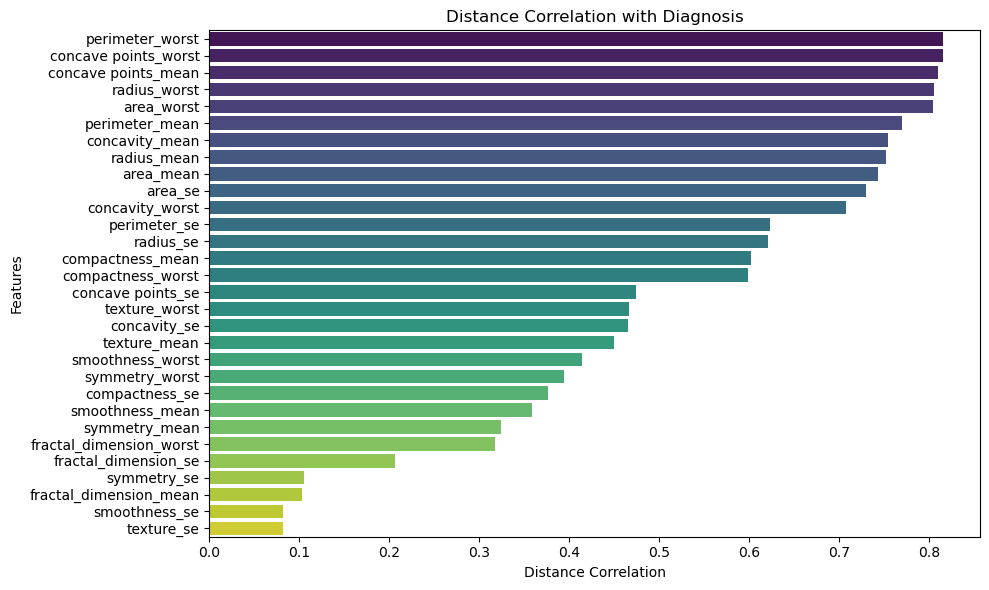

In [76]:
dcor_series = pd.Series(dcor_scores).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=dcor_series.values, y=dcor_series.index, palette='viridis')
plt.title('Distance Correlation with Diagnosis')
plt.xlabel('Distance Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [77]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_numeric
0,M,17.99,10.38,122.80,1.126421,0.11840,2.165938,1.862988,1.848558,0.2419,...,17.33,1.810506,1.652210,0.1622,1.942737,1.730182,0.2654,2.197206,1.723624,1
1,M,20.57,17.77,132.90,1.633946,0.08474,-0.384102,0.291976,0.820609,0.1812,...,23.41,1.430616,1.610022,0.1238,-0.296580,0.070746,0.1860,-0.121997,0.537179,1
2,M,19.69,21.25,130.00,1.461645,0.10960,1.163977,1.403673,1.683104,0.2069,...,25.53,1.321941,1.425307,0.1444,1.209701,1.005512,0.2430,1.218181,0.453955,1
3,M,11.42,20.38,77.58,-0.836238,0.14250,2.197843,1.642391,1.423004,0.2597,...,26.50,-0.039480,-0.436860,0.2098,2.282276,1.675087,0.2575,3.250202,2.517606,1
4,M,20.29,14.34,135.10,1.595120,0.10030,0.762392,1.407479,1.410929,0.1809,...,16.67,1.316582,1.309486,0.1374,-0.131829,0.817474,0.1625,-0.943554,-0.279402,1


In [78]:
y = df.iloc[:, 0]

X = df.iloc[:, 1:-1]

print("Target (y) shape:", y.shape)
print("Features (X) shape:", X.shape)

Target (y) shape: (569,)
Features (X) shape: (569, 30)


In [79]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1.126421,0.11840,2.165938,1.862988,1.848558,0.2419,1.886398,...,1.619635,17.33,1.810506,1.652210,0.1622,1.942737,1.730182,0.2654,2.197206,1.723624
1,20.57,17.77,132.90,1.633946,0.08474,-0.384102,0.291976,0.820609,0.1812,-0.956577,...,1.578689,23.41,1.430616,1.610022,0.1238,-0.296580,0.070746,0.1860,-0.121997,0.537179
2,19.69,21.25,130.00,1.461645,0.10960,1.163977,1.403673,1.683104,0.2069,-0.292433,...,1.419757,25.53,1.321941,1.425307,0.1444,1.209701,1.005512,0.2430,1.218181,0.453955
3,11.42,20.38,77.58,-0.836238,0.14250,2.197843,1.642391,1.423004,0.2597,2.708925,...,-0.083692,26.50,-0.039480,-0.436860,0.2098,2.282276,1.675087,0.2575,3.250202,2.517606
4,20.29,14.34,135.10,1.595120,0.10030,0.762392,1.407479,1.410929,0.1809,-0.511332,...,1.293727,16.67,1.316582,1.309486,0.1374,-0.131829,0.817474,0.1625,-0.943554,-0.279402


In [103]:
y = y.map({'M': 1, 'B': 0})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [104]:
print("NaNs:\n", df.isna().sum())
print("Zeros:\n", (df == 0).sum())
print("Missing (NaN + empty strings):\n", df.isna().sum() + (df == '').sum())

NaNs:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_numeric          0
dtype: int64
Zeros:
 diagnosis                    0
radius_mean  

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [107]:
from sklearn.utils import resample
import pandas as pd

train_df = pd.concat([X_train, y_train], axis=1)

majority = train_df[train_df['diagnosis'] == 0]
minority = train_df[train_df['diagnosis'] == 1]

minority_upsampled = resample(minority, replace=True,
                              n_samples=len(majority),
                              random_state=42)


oversampled_df = pd.concat([majority, minority_upsampled]).sample(frac=1, random_state=42)

X_train_ov = oversampled_df.drop('diagnosis', axis=1)
y_train_ov = oversampled_df['diagnosis']


In [108]:
print(y_train_ov)

441    1
187    0
452    0
239    1
446    1
      ..
150    0
342    0
153    0
201    1
439    0
Name: diagnosis, Length: 570, dtype: int64


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ov)
X_test_scaled = scaler.transform(X_test)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

=== Logistic Regression ===
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



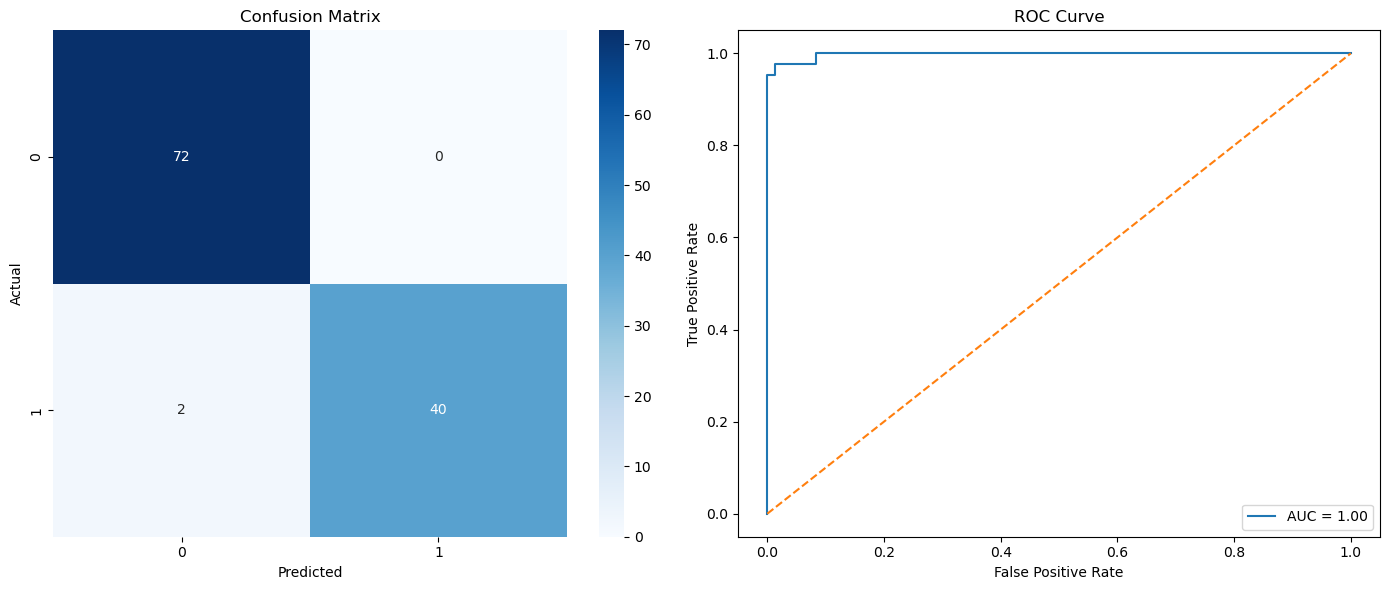

params: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [111]:
lr_model = LogisticRegression(class_weight='balanced',random_state=42)
lr_model.fit(X_train_scaled, y_train_ov)
y_pred = lr_model.predict(X_test_scaled)
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

print("params:", lr_model.get_params())

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr_model = LogisticRegression(class_weight='balanced', random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

lr_model.fit(X_train_scaled, y_train_ov)
svm_model.fit(X_train_scaled, y_train_ov)
knn_model.fit(X_train_scaled, y_train_ov)
dt_model.fit(X_train_scaled, y_train_ov)
rf_model.fit(X_train_scaled, y_train_ov)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        if hasattr(model, "decision_function"):
            decision_scores = model.decision_function(X_test)
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            y_proba = scaler.fit_transform(decision_scores.reshape(-1, 1)).ravel()
        else:
            y_proba = None
    
    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.subplot(1, 2, 2)
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    else:
        plt.text(0.5, 0.5, "No probability scores available", horizontalalignment='center', verticalalignment='center')
    plt.plot([0, 1], [0, 1], '--')
    plt.title(f"{model_name} ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

    plt.tight_layout()
    plt.show()


=== Logistic Regression ===
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



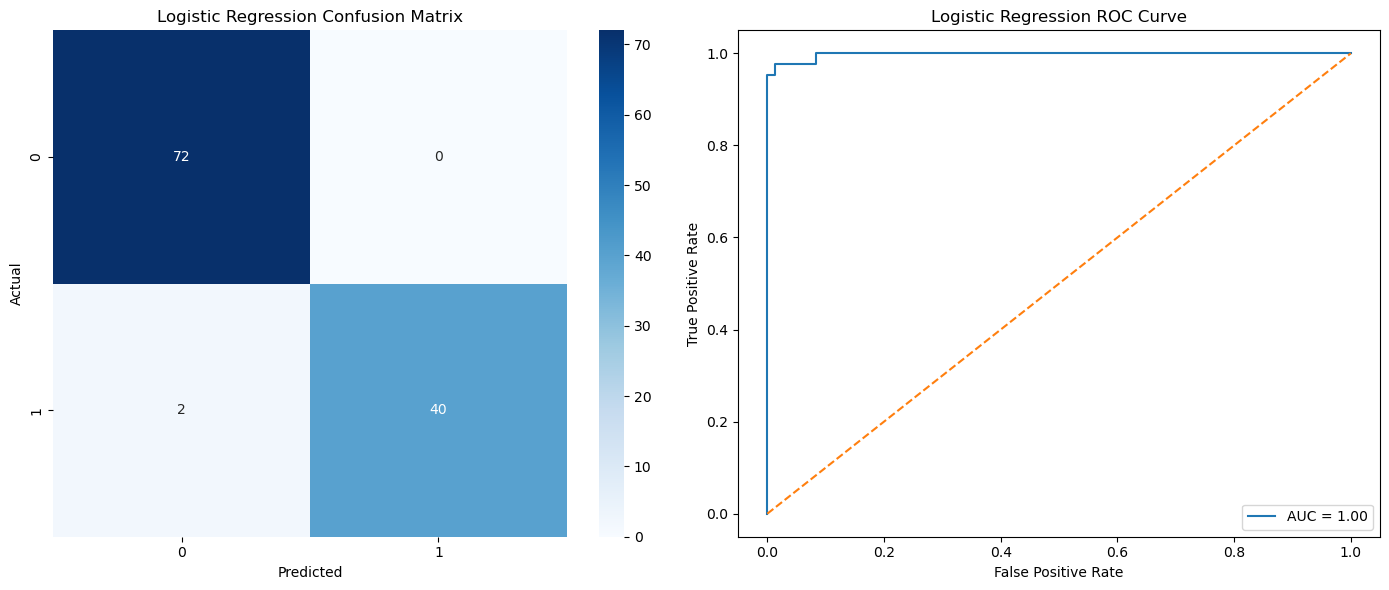

=== SVM ===
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



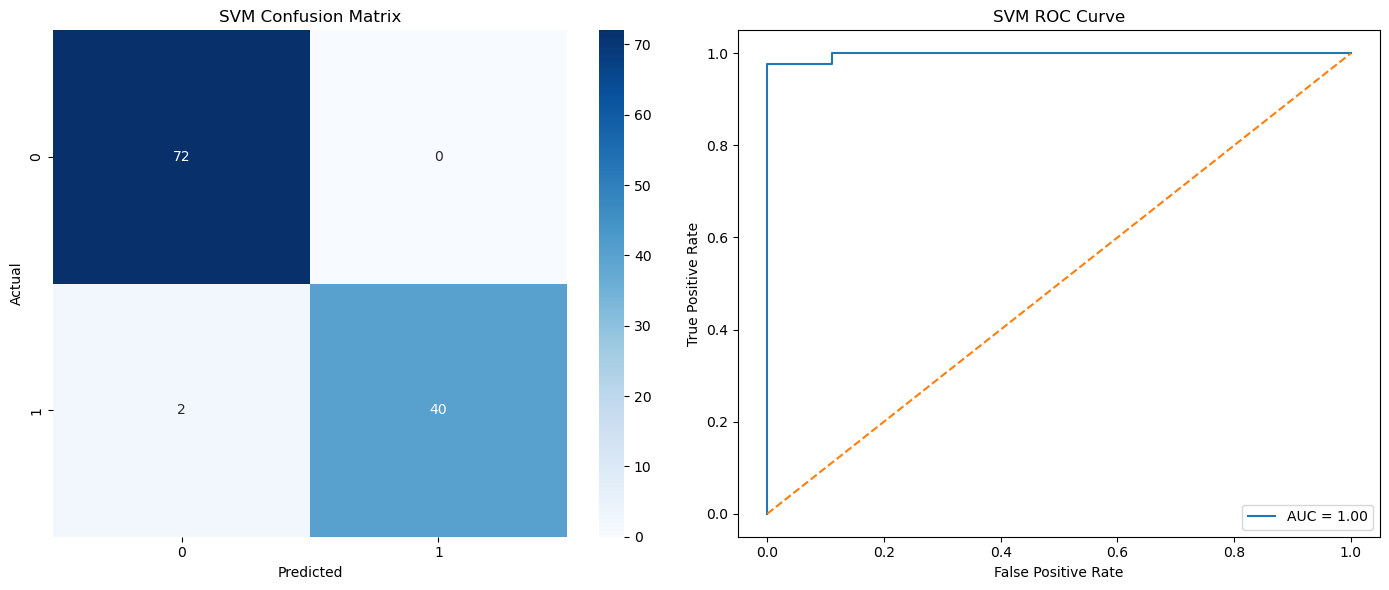

=== K-Nearest Neighbors ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



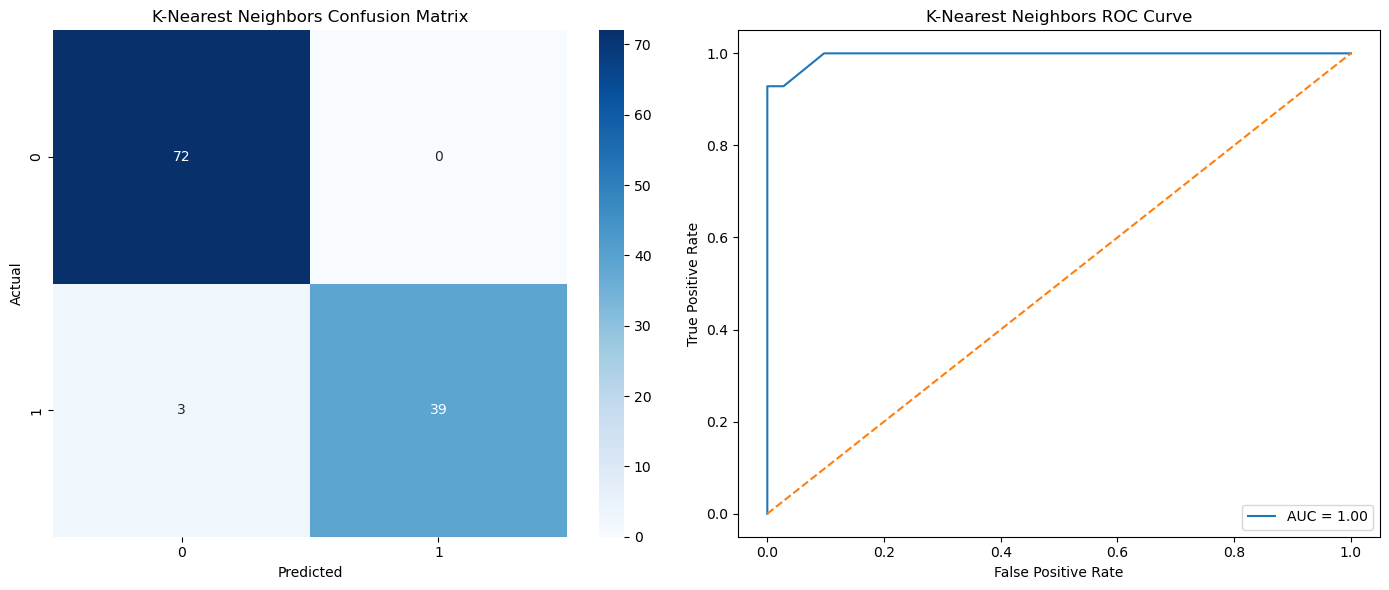

=== Decision Tree ===
Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



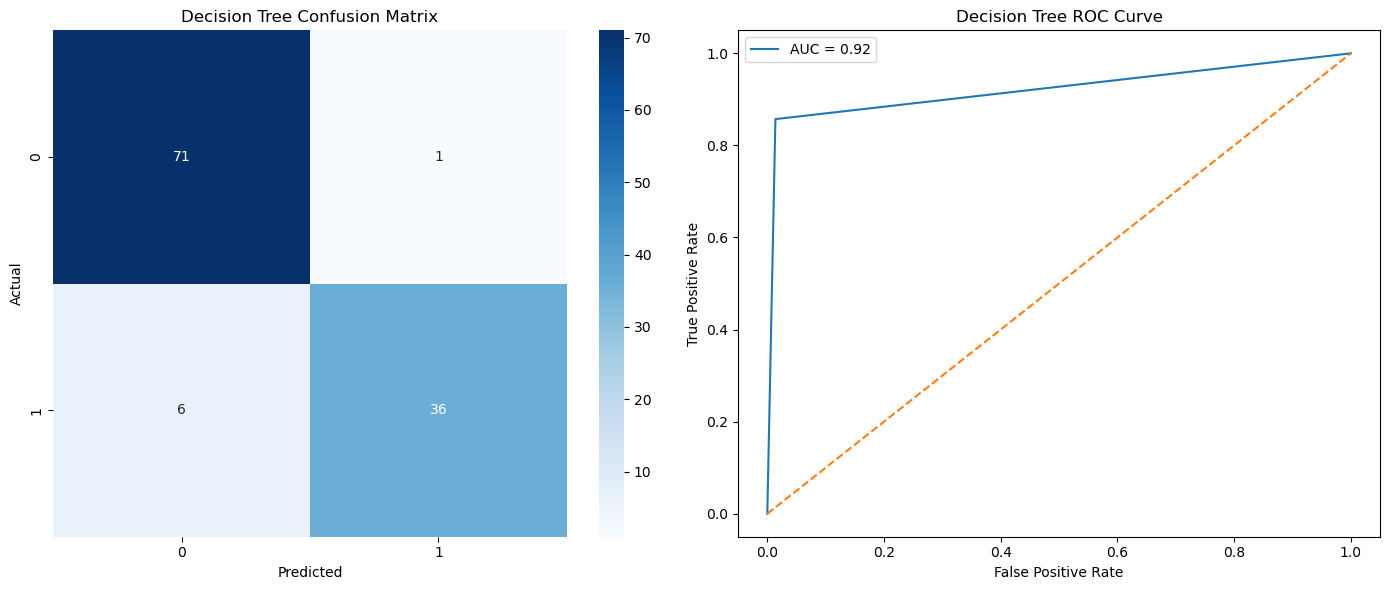

=== Random Forest ===
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



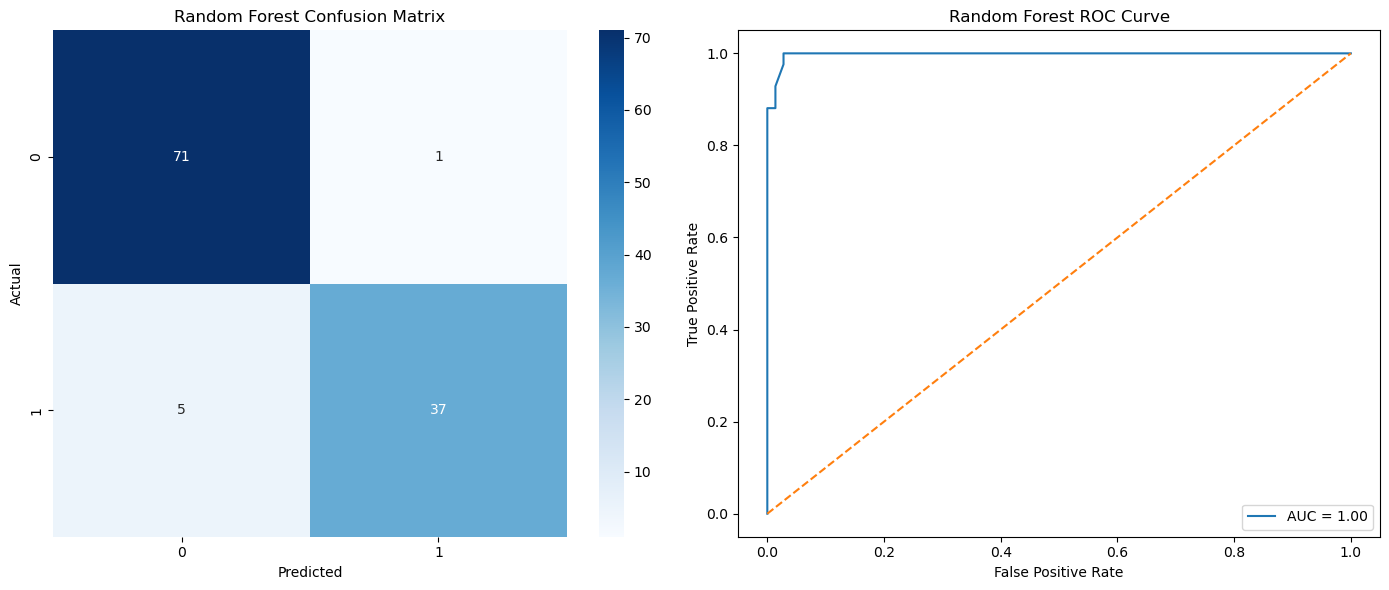

In [116]:
evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
evaluate_model(svm_model, X_test_scaled, y_test, "SVM")
evaluate_model(knn_model, X_test_scaled, y_test, "K-Nearest Neighbors")
evaluate_model(dt_model, X_test_scaled, y_test, "Decision Tree")
evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")


In [119]:
def print_key_params(model, model_name, keys):
    params = model.get_params()
    print(f"--- {model_name} Key Hyperparameters ---")
    for key in keys:
        if key in params:
            print(f"{key}: {params[key]}")
    print("\n")

key_params = {
    "Logistic Regression": ['penalty', 'C', 'solver', 'class_weight', 'max_iter'],
    "SVM": ['C', 'kernel', 'degree', 'gamma', 'class_weight', 'probability'],
    "K-Nearest Neighbors": ['n_neighbors', 'weights', 'algorithm', 'p'],
    "Decision Tree": ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'class_weight'],
    "Random Forest": ['n_estimators', 'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'class_weight']
}

models = {
    "Logistic Regression": lr_model,
    "SVM": svm_model,
    "K-Nearest Neighbors": knn_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    print_key_params(model, name, key_params[name])


--- Logistic Regression Key Hyperparameters ---
penalty: l2
C: 1.0
solver: lbfgs
class_weight: balanced
max_iter: 100


--- SVM Key Hyperparameters ---
C: 1.0
kernel: rbf
degree: 3
gamma: scale
class_weight: balanced
probability: True


--- K-Nearest Neighbors Key Hyperparameters ---
n_neighbors: 5
weights: uniform
algorithm: auto
p: 2


--- Decision Tree Key Hyperparameters ---
criterion: gini
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
class_weight: balanced


--- Random Forest Key Hyperparameters ---
n_estimators: 100
criterion: gini
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
class_weight: balanced




Best Logistic Regression Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy: 0.9912280701754386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



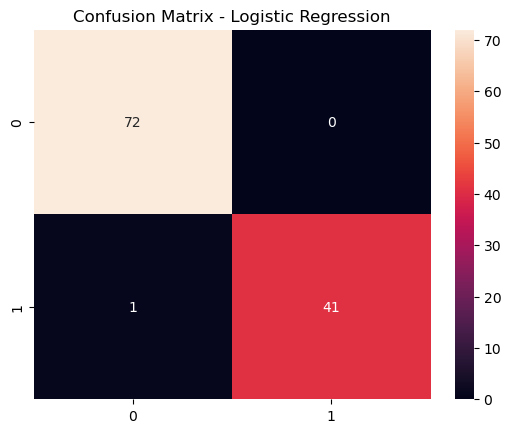

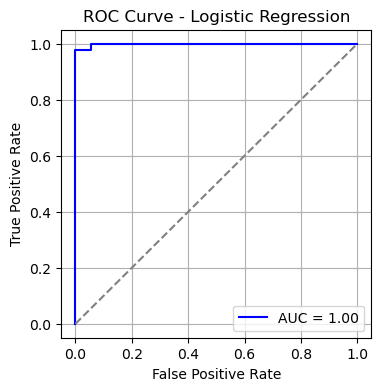

In [121]:
from sklearn.model_selection import GridSearchCV
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear supports both l1 and l2
    'class_weight': ['balanced']
}

log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train_scaled, y_train_ov)

best_log_reg = log_reg_grid.best_estimator_
print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)

y_pred = best_log_reg.predict(X_test_scaled)
y_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


Best SVM Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



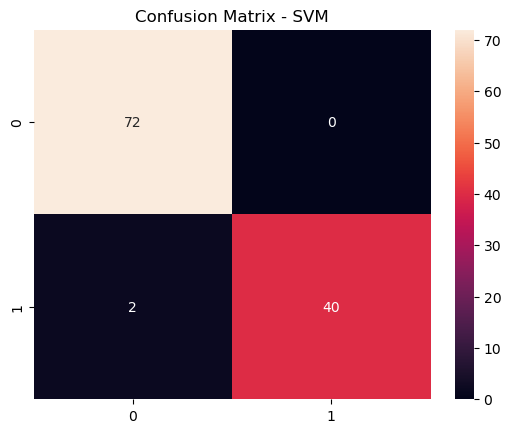

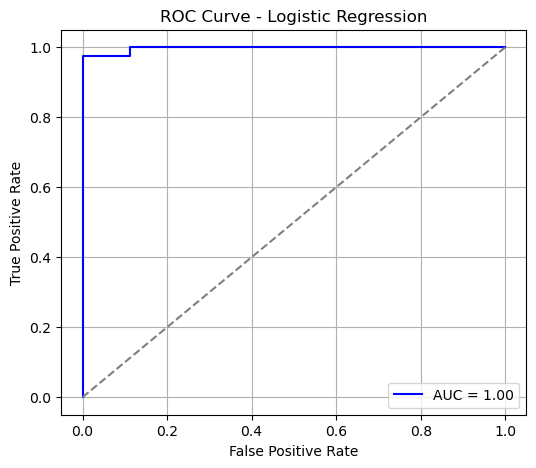

In [122]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train_ov)

best_svm = svm_grid.best_estimator_
print("Best SVM Parameters:", svm_grid.best_params_)

y_pred = best_svm.predict(X_test_scaled)
y_proba = best_svm.predict_proba(X_test_scaled)[:, 1]
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
